In [18]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


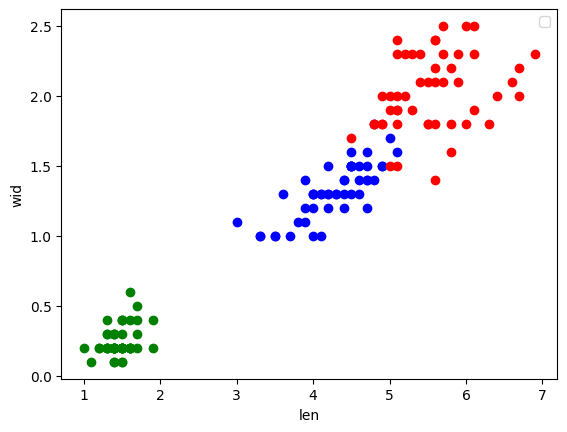

In [19]:
iris = load_iris()
iris_frame = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_frame["target"] = iris.target
i1 = iris_frame[iris_frame["target"] == 0]
i2 = iris_frame[iris_frame["target"] == 1]
i3 = iris_frame[iris_frame["target"] == 2]

plt.scatter(i1["petal length (cm)"], i1["petal width (cm)"], color="green")
plt.scatter(i2["petal length (cm)"], i2["petal width (cm)"], color="blue")
plt.scatter(i3["petal length (cm)"], i3["petal width (cm)"], color="red")

plt.xlabel('len')
plt.ylabel('wid')
plt.legend()

c:\Users\Артём\Desktop\лекции\Саморазвитие\ml_ind\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Артём\Desktop\лекции\Саморазвитие\ml_ind\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Артём\Desktop\лекции\Саморазвитие\ml_ind\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Артём\Desktop\лекции\Саморазвитие\ml_ind\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the va

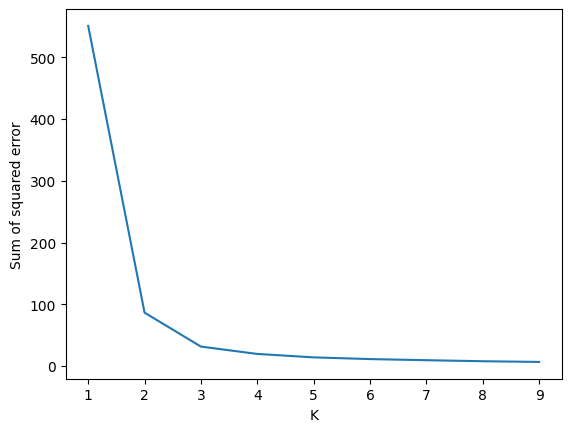

In [20]:
sse = []
for n in range(1, 10):
    km = KMeans(n_clusters=n)
    km.fit(iris_frame[["petal length (cm)", "petal width (cm)"]])
    sse.append(km.inertia_)



plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(range(1, 10),sse)

c:\Users\Артём\Desktop\лекции\Саморазвитие\ml_ind\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


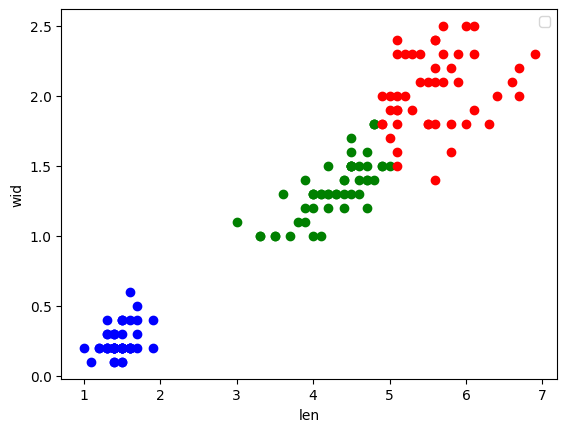

In [21]:
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(iris_frame[["petal length (cm)", "petal width (cm)"]])
iris_frame["cluster"] = y_pred

i1 = iris_frame[iris_frame["cluster"] == 0]
i2 = iris_frame[iris_frame["cluster"] == 1]
i3 = iris_frame[iris_frame["cluster"] == 2]

plt.scatter(i1["petal length (cm)"], i1["petal width (cm)"], color="green")
plt.scatter(i2["petal length (cm)"], i2["petal width (cm)"], color="blue")
plt.scatter(i3["petal length (cm)"], i3["petal width (cm)"], color="red")

plt.xlabel('len')
plt.ylabel('wid')
plt.legend()

10.770329614269007


Text(95.72222222222221, 0.5, 'Truth')

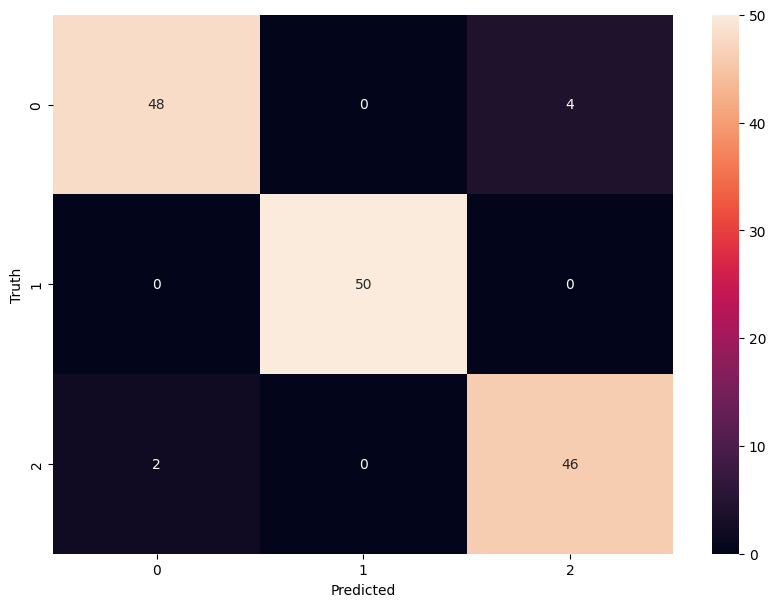

In [26]:
print(np.linalg.norm(np.array(y_pred) - np.array(iris.target)))
iris_target = np.array(iris.target)
one = iris_target[iris_target == 1]
other = iris_target[iris_target != 1]
y_true = np.append(one, other)
cm = confusion_matrix(y_pred, y_true)

plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')